In [1]:
from pyparticle.population import build_population
import numpy as np 

Ntot = 1e9
GMD = 50e-9
GSD = 1.6
frac_BC = 0.2
N_bins = 50 
D_min = 1e-10
D_max = 1e-2

pop_cfg_internallyMixed = {
    "type": "binned_lognormals",
    "N": [Ntot],
    "GMD": [GMD],
    "GSD": [GSD],
    "aero_spec_names": [["SO4","BC"]], # one population of internally mixed particles
    "aero_spec_fracs": [[(1.-frac_BC), frac_BC]], # mass fraction of each species in each particle
    "N_bins": N_bins,
    "D_min": D_min,
    "D_max": D_max,
  }

pop_cfg_externallyMixed = {
    "type": "binned_lognormals",
    # fixme: doen't quite conserve mass; this is quick check
    "N": [Ntot*(1-frac_BC), Ntot*frac_BC], # sulfate and BC split into separate populations
    "GMD": [GMD, GMD],
    "GSD": [GSD, GSD],
    "aero_spec_names": [["SO4"], ["BC"]], #one population of pure sulfate, one of pure BC
    "aero_spec_fracs": [[1.0], [1.]], # pure(ish) species
    # "aero_spec_names": [["SO4"], ["BC"]], #one population of pure sulfate, one of pure BC
    # "aero_spec_fracs": [[1.0], [1.0]], # pure species
    "N_bins": N_bins,
    "D_min": D_min,
    "D_max": D_max,
  }


pop_configs = [pop_cfg_internallyMixed, pop_cfg_externallyMixed]
pop_int = build_population(pop_cfg_internallyMixed)
pop_ext = build_population(pop_cfg_externallyMixed)





FileNotFoundError: [Errno 2] No such file or directory: '/Users/fier887/Library/CloudStorage/OneDrive-PNNL/Code/pyparticle/examples/datasets/species_data/aero_data.dat'

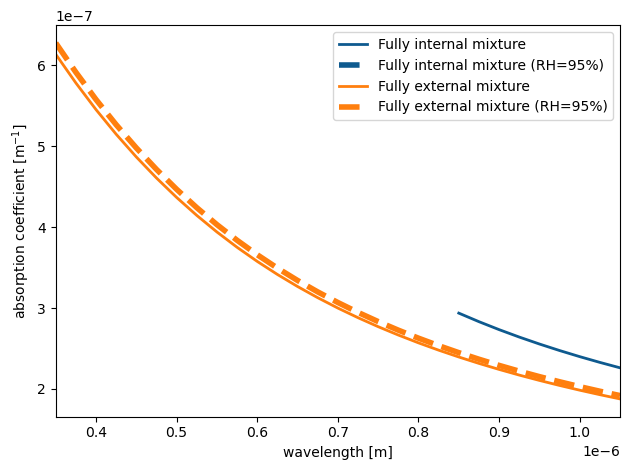

In [ ]:

from pyparticle.viz.style import StyleManager, Theme
from pyparticle.viz.builder import build_plotter
mgr = StyleManager(Theme(), deterministic=False)

series = [
    {"key": "int", "population": pop_int, "label": "Fully internal mixture"},
    {"key": "ext", "population": pop_ext, "label": "Fully external mixture"},
]
line_styles = mgr.plan("line", [s["key"] for s in series])

import matplotlib.pyplot as plt
from helpers.pymiescatt_comparison import pymiescatt_lognormal_optics

varname = "b_abs"
fig, ax = plt.subplots()
for s in series:
    cfg = {
        "varname": varname,
        "var_cfg": {"morphology":"core-shell", "wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
    
    cfg_rh = cfg.copy()
    cfg_rh["var_cfg"]["rh_grid"] = [0.95]
    cfg_rh["style"] = line_styles[s["key"]].copy()
    cfg_rh["style"]["linestyle"] = "--"
    cfg_rh["style"]["linewidth"] = 2*cfg["style"]["linewidth"]
    plotter_rh50 = build_plotter("state_line", cfg_rh)
    plotter_rh50.plot(s["population"], ax, label=s["label"]+" (RH=95%)")

ax.legend(); fig.tight_layout()

In [ ]:


# problems: (2) need to force same RI for PyMieScatt/PyParticle calcs -- spec modifications? [I think this is ok: (1) effective RI seems wrong -- should be uniform; ]